<a href="https://colab.research.google.com/github/Romyull-Islam/Credit-Card-Fruad-Detection/blob/master/sentiment_analysis_sample_code_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of Hotel review Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML project/hotel_review_data.csv')

In [4]:
df.shape

(38932, 5)

In [5]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
df.describe()
#df.describe().transpose()


,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


## Data Cleaning / EDA

In [8]:
### Checking Missing values and the percentage for Missing:
totalnull = df.isnull().sum()
count = totalnull.sort_values(ascending=False)
percentage = ((totalnull/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')
missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


happy        26521
not happy    12411
Name: Is_Response, dtype: int64
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


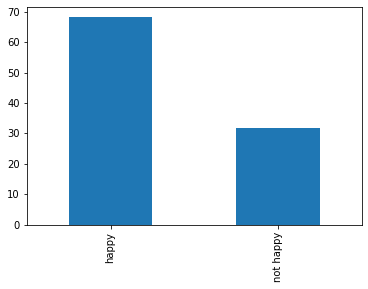

In [9]:
### Checking for the Distribution of Default ###
print(round(df.Is_Response.value_counts())) # value counts gives the frequency of unique values 

print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()

In [10]:
#Removing columns
df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [11]:
#Cleaning 
import re # When you have imported the re module, you can start using regular expressions:
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x) # lambda function 
# lambda function is a powerful process when we use them with Python’s built-in functions.

In [12]:
# Let's take a look at the updated text
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


# Data partition

In [13]:
from sklearn.model_selection import train_test_split

x = df.cleaned_description
y = df.Is_Response

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 225)

print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))
y_test.head()


x_train : 35038
x_test  : 3894
y_train : 35038
y_test  : 3894


26227        happy
12316        happy
29221        happy
25110    not happy
27692        happy
Name: Is_Response, dtype: object

# Model training

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver = "lbfgs")

In [15]:
# # importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('vectorizer',tvec), ('classifier',clf1)]) 
# This is a very simple model without optimization. Here we did not add any optimization things.

model.fit(x_train, y_train) # Let’s call fit() method of the pipe object on our training data



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

#Prediction

In [16]:
predictions = model.predict(x_test)

# Model evaluation

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions, y_test)

array([[2418,  305],
       [ 153, 1018]])

In [18]:
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


In [19]:
# make the categorical to binary
y_numeric, meta_data = pd.factorize(y_test)
pred_numeric, meta_data = pd.factorize(predictions)

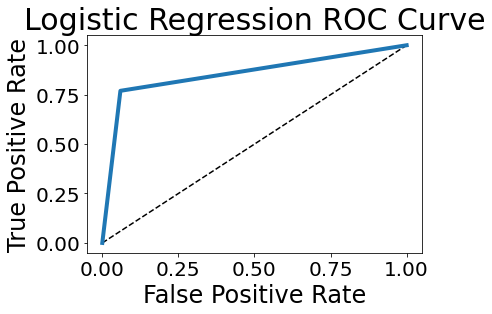

In [20]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric, pred_numeric)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Logistic Regression ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()


In [21]:
# Get the AUC metric:
AUC = roc_auc_score(y_numeric, pred_numeric)
print(AUC)

0.8549767112860963


## Trying on new reviews 

In [22]:
example = ["The hotel has small rooms"]
result = model.predict(example)
print(result)

['not happy']


Perceptron with 10 neuron


In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
model= Sequential()
model.add(Dense(10, activation='tanh'),)
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train)

UnimplementedError: ignored